# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [161]:
import pandas as pd
        
previsao_de_renda = pd.read_csv('../../../../Datasets/previsao_de_renda.csv', sep = ',')
previsao_de_renda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [162]:
# dropando a coluna index   
previsao_de_renda.drop(columns=['index','Unnamed: 0'], inplace=True)

In [163]:
# array com variáveis quantitativas
variaveis_quantitativas = previsao_de_renda.select_dtypes(include=['float64', 'int64']).columns

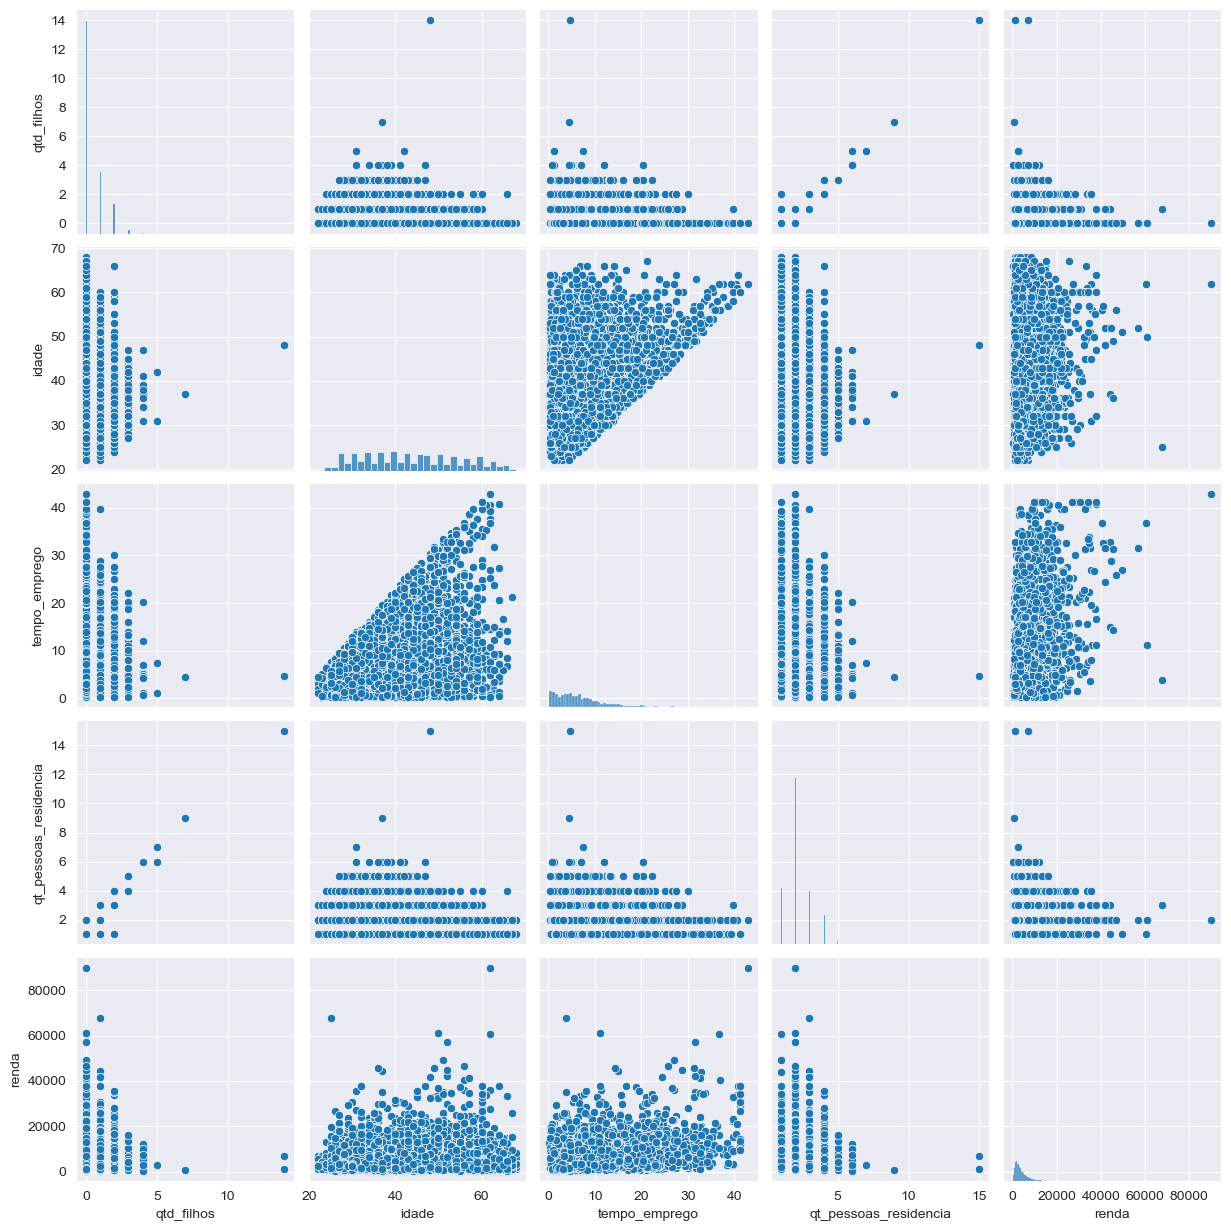

In [164]:
# Matriz de dispersão
import seaborn as sns
sns.pairplot(previsao_de_renda[variaveis_quantitativas])

In [165]:
previsao_de_renda[variaveis_quantitativas].corr()   

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


    2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

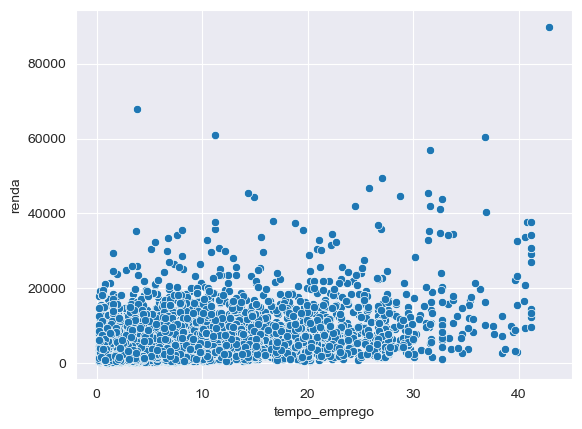

In [166]:
import seaborn as sns

# Scatterplot for 'tempo_emprego' vs 'renda'
sns.scatterplot(x='tempo_emprego', y='renda', data=previsao_de_renda)

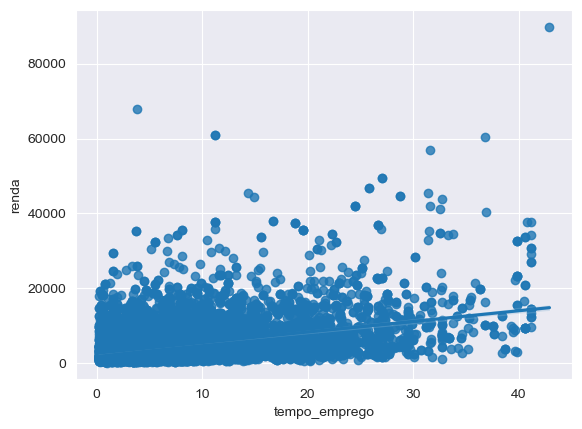

In [183]:
_ = sns.regplot(x='tempo_emprego', y='renda', data=previsao_de_renda)

<Axes: xlabel='idade', ylabel='renda'>

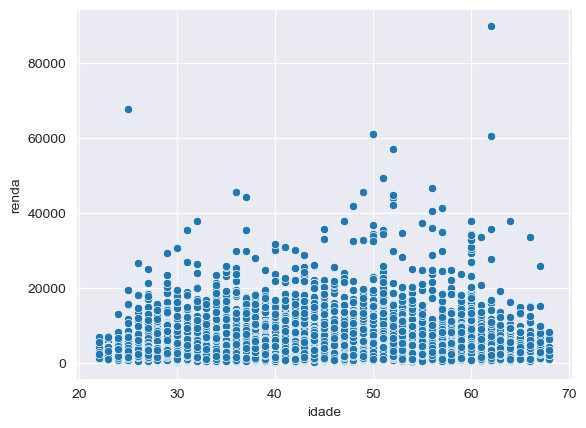

In [167]:
# Scatterplot for 'idade' vs 'renda'
sns.scatterplot(x='idade', y='renda', data=previsao_de_renda)

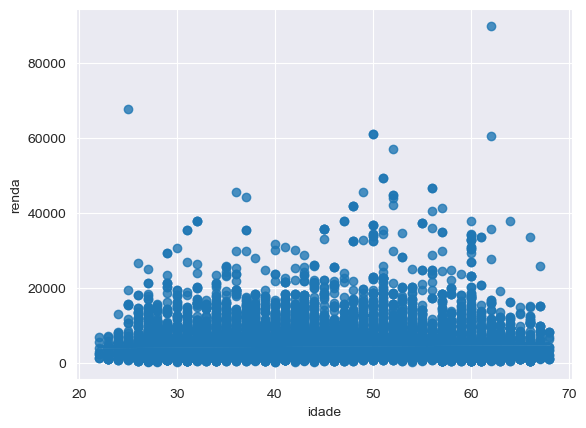

In [184]:
_ = sns.regplot(x='idade', y='renda', data=previsao_de_renda)

3) Na su aopinião, há outliers na variável renda?

Método 1: Identificação de outliers através de z-score

In [168]:
import numpy as np
data= previsao_de_renda['renda']
from scipy import stats 

# Calcula a pontuação Z
z_scores = np.abs(stats.zscore(data))

# Identifica onde a pontuação Z é maior que 3 ou menor que -3
outliers = data[z_scores > 3]

print("Outliers:", outliers.count())

Outliers: 263


Método 2: Identificação de outliers através do IQR

In [169]:

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Identifica outliers
outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]

print("Outliers:", outliers.count())


Outliers: 1026


Método 3: Identificação de outliers através de Isolation Forest

In [170]:
from sklearn.ensemble import IsolationForest

# Ajuste do modelo usando o DataFrame diretamente, mantendo o nome da coluna
clf = IsolationForest(random_state=0).fit(previsao_de_renda[['renda']])

# Uso da previsão mantendo a estrutura do DataFrame
outliers = previsao_de_renda[clf.predict(previsao_de_renda[['renda']]) == -1]

print("Outliers:", outliers['renda'].count())

Outliers: 2681


Método 4: Identificação de outliers através de DBSCAN   

In [171]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(previsao_de_renda[['renda']].values.reshape(-1, 1))
outliers = previsao_de_renda['renda'][clustering.labels_ == -1]

print("Outliers:", outliers.count())

Outliers: 458


Resposta: Sim, há muitos outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [172]:
# logaritmo da variável renda
import numpy as np
previsao_de_renda['log_renda'] = np.log(previsao_de_renda['renda'])
# adicionar a variável log_renda ao array de variáveis quantitativas
variaveis_quantitativas = previsao_de_renda.select_dtypes(include=['float64', 'int64']).columns

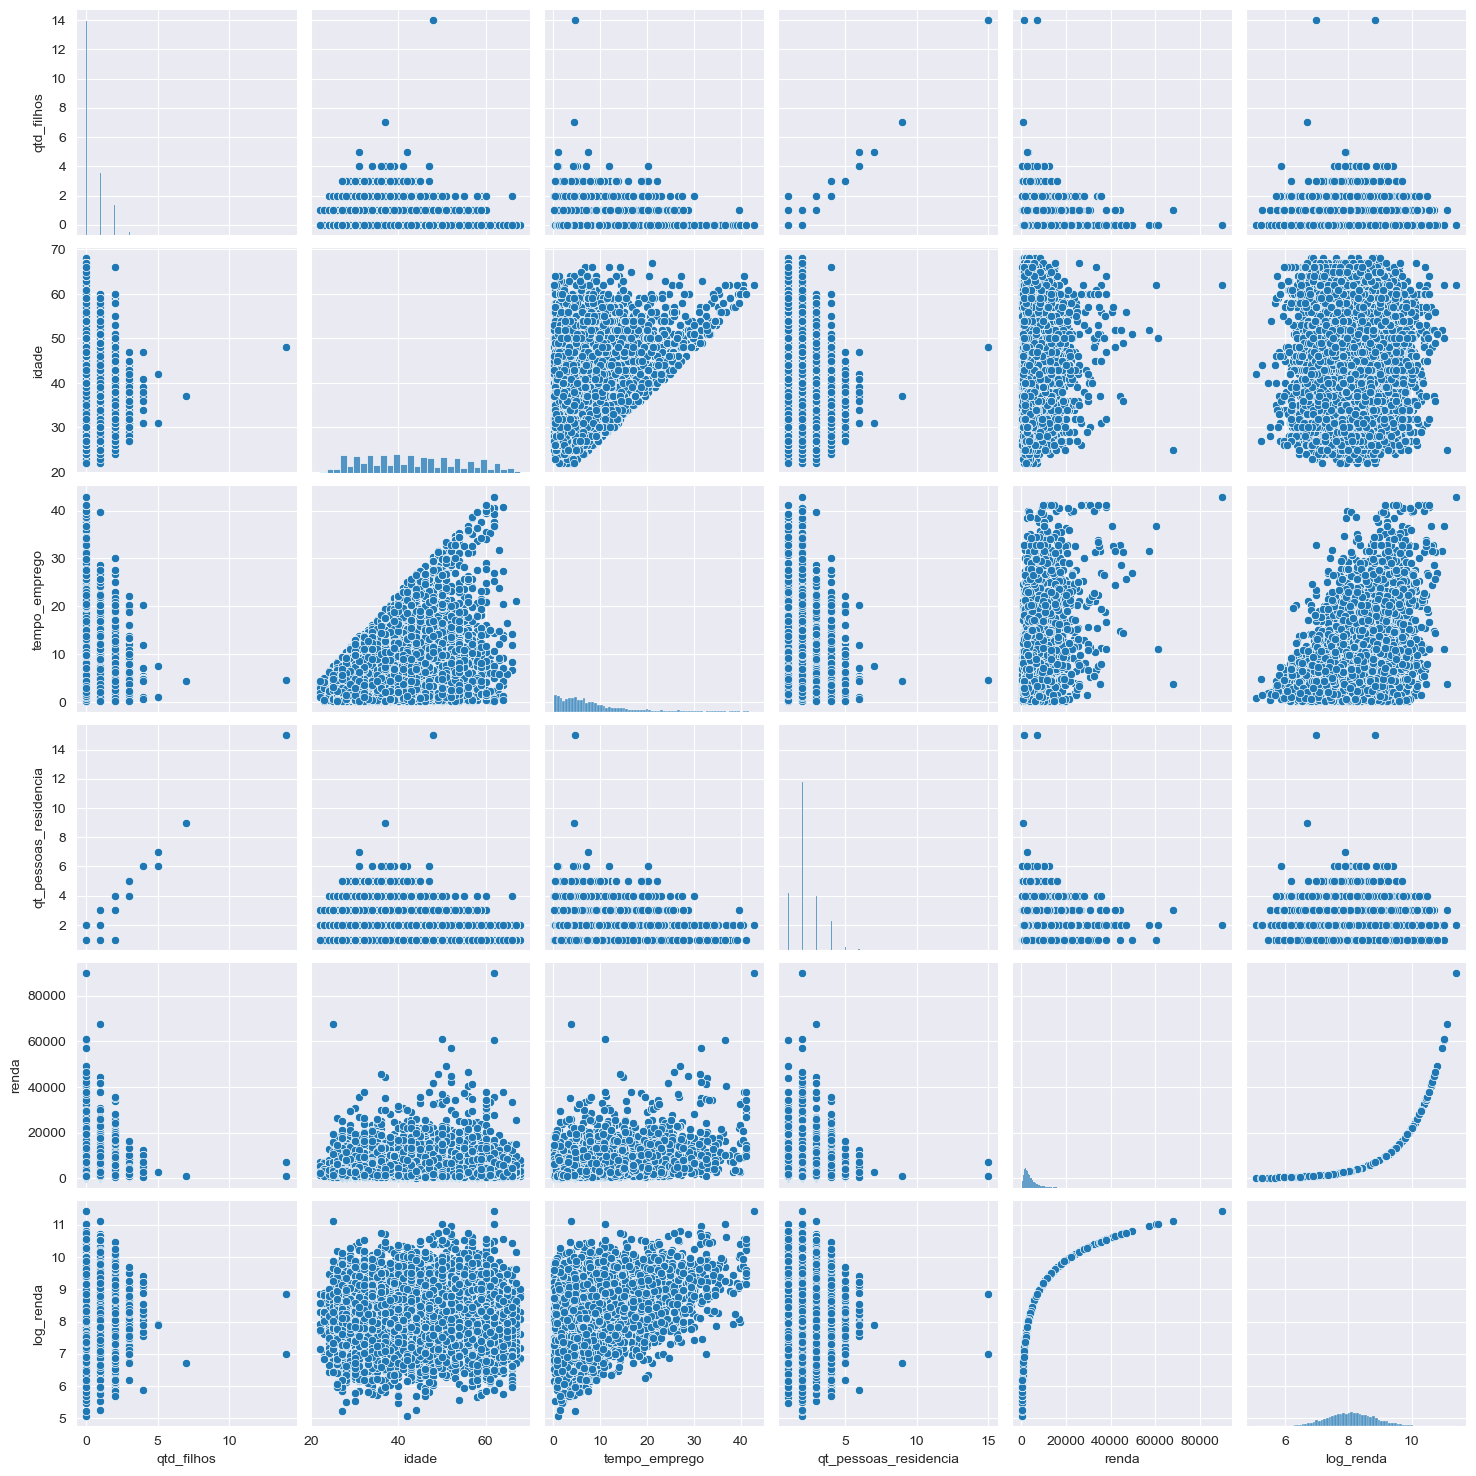

In [173]:
# repetindo a sequência de análise
sns.pairplot(previsao_de_renda[variaveis_quantitativas])

In [174]:
previsao_de_renda[variaveis_quantitativas].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

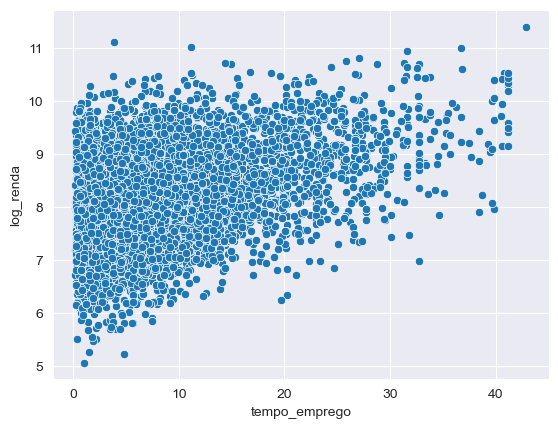

In [175]:
# Scatterplot for 'tempo_emprego' vs 'renda'
sns.scatterplot(x='tempo_emprego', y='log_renda', data=previsao_de_renda)

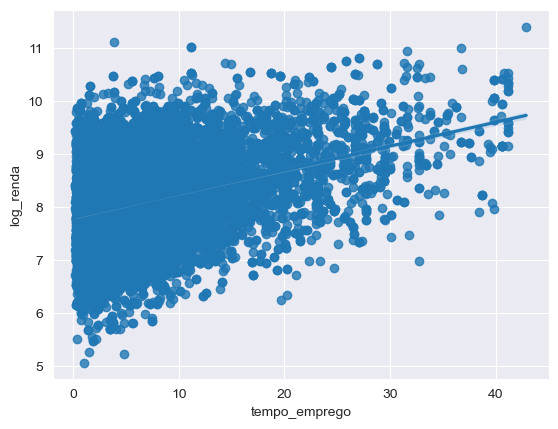

In [176]:
_ = sns.regplot(x='tempo_emprego', y='log_renda', data=previsao_de_renda)

<Axes: xlabel='idade', ylabel='log_renda'>

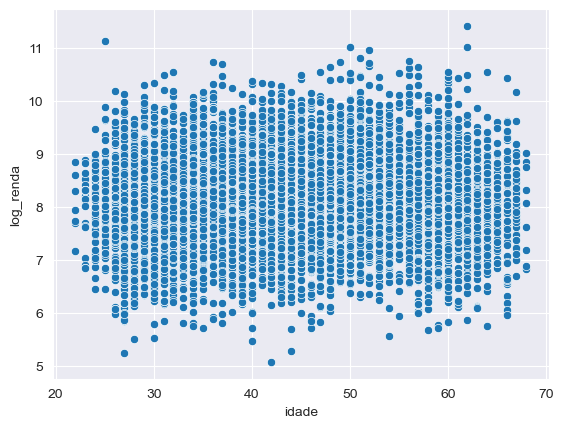

In [177]:
# Scatterplot for 'idade' vs 'renda'
sns.scatterplot(x='idade', y='log_renda', data=previsao_de_renda)

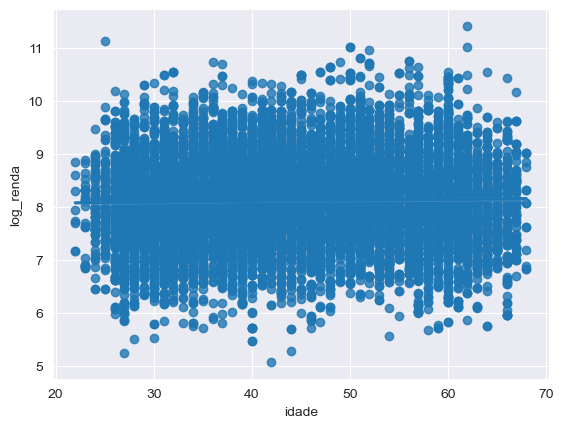

In [178]:
_ = sns.regplot(x='idade', y='log_renda', data=previsao_de_renda)

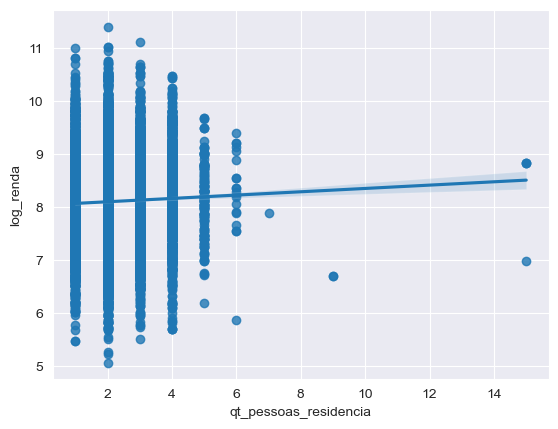

In [179]:
_ = sns.regplot(x='qt_pessoas_residencia', y='log_renda', data=previsao_de_renda)

5) A aplicação do LOG você acha que melhorou ou piorou a análise? 
 qt_pessoas_residencia foi a que mais aumentou a correlação com a renda após a aplicação do log. fora isso, não houve muita diferença.

In [180]:
# utilizando rank
df_rank = pd.concat([previsao_de_renda[variaveis_quantitativas], previsao_de_renda[variaveis_quantitativas].rank()], axis=1)

In [181]:
print(df_rank.columns)  
# colocando '_rank' no nome das colunas da metade para frente 
df_rank.columns = list(df_rank.columns[:len(variaveis_quantitativas)]) + [str(col) + '_rank' for col in df_rank.columns[len(variaveis_quantitativas):]]
print(df_rank.columns)



Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'log_renda', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'log_renda'],
      dtype='object')
Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'log_renda', 'qtd_filhos_rank', 'idade_rank',
       'tempo_emprego_rank', 'qt_pessoas_residencia_rank', 'renda_rank',
       'log_renda_rank'],
      dtype='object')


In [182]:
df_rank.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,qtd_filhos_rank,idade_rank,tempo_emprego_rank,qt_pessoas_residencia_rank,renda_rank,log_renda_rank
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743,0.921580,-0.364443,-0.033872,0.780250,0.025169,0.025169
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712,-0.416325,0.996999,0.250460,-0.352679,0.018163,0.018163
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556,-0.091073,0.323543,0.885458,-0.071998,0.352134,0.352134
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267,0.837686,-0.336830,-0.015238,0.950684,0.038865,0.038865
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734,0.005835,0.048215,0.301799,0.020812,0.754549,0.754549
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000,0.018822,0.031408,0.335188,0.034799,0.974594,0.974594
qtd_filhos_rank,0.921580,-0.416325,-0.091073,0.837686,0.005835,0.018822,1.000000,-0.416238,-0.049092,0.833497,0.018905,0.018905
idade_rank,-0.364443,0.996999,0.323543,-0.336830,0.048215,0.031408,-0.416238,1.000000,0.252246,-0.349957,0.024496,0.024496
tempo_emprego_rank,-0.033872,0.250460,0.885458,-0.015238,0.301799,0.335188,-0.049092,0.252246,1.000000,-0.018702,0.322303,0.322303
qt_pessoas_residencia_rank,0.780250,-0.352679,-0.071998,0.950684,0.020812,0.034799,0.833497,-0.349957,-0.018702,1.000000,0.036609,0.036609


 Com o rank não houve melhora na análise
 parece realmente que a única variável que tem correlação com a renda é o tempo de emprego.